# Introduction - Theory 

### Time Series Decomposition

A common exploratory tool to understand time series is to decompose it into the following: 
1.	Trend
2.	Seasonality
3.	Noise 
 
 
**Trend**

- Trend represents the overall direction or tendency of the time series over an extended period. It captures the underlying growth or decline in the data, excluding short-term fluctuations and noise. Identifying the trend is crucial for understanding the fundamental changes in the data, such as long-term growth, economic cycles, or other persistent patterns.

**Seasonal Variation:**

- Seasonal variation refers to regular and predictable fluctuations in the time series that occur at specific intervals, often within a year. These patterns can be attributed to external factors like seasons, holidays, or other recurring events. Separating seasonal variation from the overall trend allows analysts to identify and understand the periodic patterns that repeat over a certain time frame. This is particularly important in industries or domains where certain seasons or events strongly influence the data.

**Residual Variation**

- The residual, or error, variation represents the part of the time series that cannot be explained by the smooth trend or the seasonal component. It includes random fluctuations, measurement errors, and other irregularities. Analyzing the residual variation helps assess the accuracy of the decomposition model. Ideally, the residuals should appear random and exhibit no discernible pattern. If there are patterns in the residuals, it may indicate that the model has not captured all the underlying structures in the data.


### Stationarity of Time Series

Many of models such as AR, MA, ARMA, and most importantly, ARIMA work with time series. Hence, its important to understand what that means. The following discussion is based Ritviz video on "Stationarity". 

The three conditions for a stationary time series are the following: 
1. The mean $\mu$ is constant. 
2. The deviation $\sigma$ is constant 
3. There is no seasonality or periodicity. 


For example, consider the following time series: 

 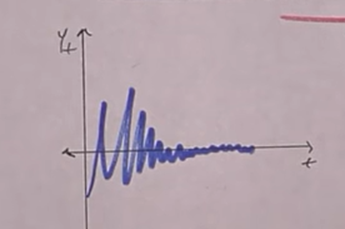
 
For this time series, the mean is constant and is around the t-axis and therefore should converge to 0. Similarly, there is no seasonality as the overall trend remains the same. However, note that that initially there is a lot of fluctuation of y_t values but then as time progresses these fluctuations die out. Hence, this time series violate condition (2). 
On the other hand, consider the following time series: 

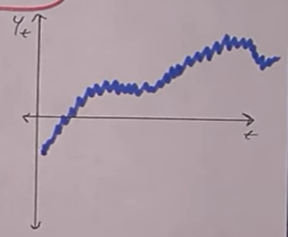
	 
This time series has a constant standard deviation as the value of y_T on average remains the same. Similarly, there is no seasonality. However, notice that the mean is not constant and changes. Hence, this time series is also not stationary. Finally, consider the following time series:

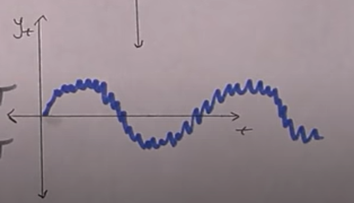

 
This time series is also not stationary since it displays seasonality. That is, it is periodic

### How to make time-series stationary?

Consider the following time series:

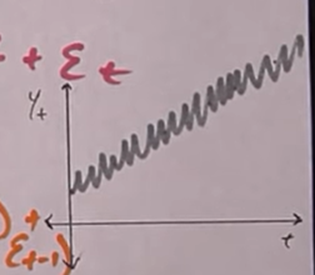

The time series show a clear trend, with the value of $y_{T}$ increasing over. However, notice that this trend component of the time series above causes the mean of the time series to become non-constant. Hence, we need to remove the trend component in order to make the time series stationary. 

One of the most common methods to do this is through differencing. This involves taking the difference between consecutive observations. It helps remove the trend component and stabilize the variance. Mathematically, if $Y_t$ is the value at time t, then the differenced series is: 

$$\nabla Y_{t} = Y_{t} - Y_{t-1}$$


Other ways of making time series stationary include: 
1.	Log Transformation: Applying a logarithmic transformation is useful when the data exhibits exponential growth or a rapidly increasing variance over time.

2.	Moving Averages: Smoothing the time series using a moving average can help reduce short-term fluctuations and emphasize the underlying trend. This can be particularly useful for financial time series data.

3.	Seasonal Differencing: For time series with a seasonal component, differencing at the seasonal lag can be performed to remove the seasonality.

4.	Removing Trends: Techniques like polynomial fitting or regression can be used to remove trends from the data, making it more stationary.

5.	Decomposition: Decomposing the time series into trend, seasonal, and residual components can help identify and remove the trend and seasonal elements.


It's important to note that the choice of method depends on the characteristics of the specific time series data. After applying these transformations, analysts often perform statistical tests (such as the **Augmented Dickey-Fuller test**) to confirm stationarity. Once stationarity is achieved, the data is better suited for modeling and analysis using various time series techniques. 

However, notice that this differencing removed the trend. For our linear series, $\nabla Y_T$ will be approximately constant. We will see in the following model how Prophet does not do this, and therefore learns the trend as well.




### Understanding Persistence Models, AR, MA, ARMA, ARIMA and SRIMA


#### Persistance Models 

These are simple baseline model that uses the previous time step's value as the prediction for the next time step. This basic approach assumes that the future values of a time series are likely to be similar to the recent past. That is why they are also known as a "naive" or "lag model". They use the most recent observation in the time series as the prediction for the next time step.

If $y_{t}$ represents the value of the time series at time t, the prediction (\hat{y}_{t+1}) using a persistence model would be:

$$\hat{y}_{t+1} = y_{t} $$ 


Persistence models are often used as a baseline to compare the performance of more complex forecasting models. It serves as a benchmark to assess whether more advanced models are providing meaningful improvements over this simple approach.

#### Autoregressive (AR) models 

An Autogressive Model is a type of time series model that describes the relationship between a variable and its past values. In an AR model, the future value of the variable is predicted as a linear combination of its past values. The term "autoregressive" indicates that the model is regressing the variable against itself.
The general form of an autoregressive model of order p, denoted as AR(p), can be expressed as follows:

   $$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t$$

Where,
1. $X_t$ is the value of the time series at time t.
2. $c$ is a constant or intercept term.
3. $ϕ_1,ϕ_2  ,….,ϕ_p$ are the autoregressive parameters, which represents the weights assigned to the past values 
4. $X_{t-1},X_{t-2}  ,…,X_{t-p}$ are the past values of the time series.
5. $ε_t$ is the error term or white noise at time 

Now that we know what all the parts of the model represent, let’s try to interpret it. According to the equation, values at a given period $X_{t}$ are equal to some portion $ϕ_{1}$ of values in the last period $X_{t-1}$, plus some constant benchmark $C$ and unpredictable shocks $ε_t$

The order p specifies how many past values are considered in the model. For example, in an AR(1) model, only the immediately preceding value $X_{t-1}$ is used, while in an AR(2) model, both $X_{t-1}$ and $X_{t-2}$ are considered. 

On the other hand, a time-series about meteorological condition might incorporate lag from the last 7 days. Hence, the model should take into account values up to 7 periods back.
From a mathematical point of view, a model using two lags (AR(2)) would look as follows:

$$X_{t} = C + \phi_{1} X_{t-1} + \phi_{2} X_{t-2} + \varepsilon_t$$

#### The moving averages model:

The Moving Average (MA) model is another type of time series model used for analyzing and forecasting sequential data. Unlike autoregressive models, which relate the current value to past values, the MA model focuses on modeling the relationship between the current value and past forecast errors or white noise.
The general form of a Moving Average model of order q, denoted as MA(q), is expressed as follows:

The time series model is represented by the equation:

$$ X_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_p \varepsilon_{t-q} $$

Where:
1.  $ X_t $ is the value of the time series at time \( t \).
2. $c$ is a constant or intercept term.
3. $ \theta_1, \theta_2, \ldots, \theta_p $ are the autoregressive parameters, representing the weights assigned to the past values.
4. $ \varepsilon_{t-1}, \varepsilon_{t-2}, \ldots, \varepsilon_{t-q} $ are the past error terms or white noise at time.

This equation captures the relationship between the current value of the time series, a constant term, and the weighted sum of past error terms.

 
Essentially, the moving average takes information about how wrong you were in the previous time period to make a better estimate for the current time period.  The order q specifies how many past forecast errors are considered in the model. For example, in an MA(1) model, only the immediately preceding forecast error $ \varepsilon_{t-1}$ is used, while in an MA(2) model, both $ \varepsilon_{t-1}$ and $ \varepsilon_{t-2}$ are considered.
For example, suppose a professor is hosting a party and asks you to bring to cupcakes but does not specify their amount. You choose to bring 10. However, the professor says that’s two more. If we use MA(1) with $ \varepsilon_{t}$ fixed to 0.5, we have: 
	
$$X_{t}=10+0.5(-2) = 9$$ 

Therefore, if you’re using MA(1), for the next party you should bring 9 cupcakes.

#### ARMA model: 

An Autoregressive Moving Average (ARMA) model is a type of time series model that combines both autoregressive (AR) and moving average (MA) components. It is used for analyzing and forecasting time series data. The ARMA model is specified by two parameters: p (the order of the autoregressive component) and q (the order of the moving average component). Therefore, we obtain: 

$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_p \varepsilon_{t-q} $$


The ARMA model combines the autoregressive feature, which captures the relationship between the current value and its past values, with the moving average feature, which captures the relationship between the current value and past forecast errors. The orders p and q determine how many past values and forecast errors are considered in the model.


#### ARIMA model: 

The Autoregressive Integrated Moving Average (ARIMA) model is a time series forecasting method that combines autoregression (AR), differencing (I), and moving average (MA) components. ARIMA is designed to handle time series data exhibiting trends and seasonality, something we looked into the previous exposition. 

The main novelty is ofcourse the integrated component (I). This component involves differencing the time series data to make it stationary. Stationarity means that the statistical properties of the time series, such as mean and variance, do not change over time. The order of differencing is denoted by d.
Hence, we would have: 

$$ Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \phi_p Y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_p \varepsilon_{t-q} $$


    
Where $Y_{t-1}  ,Y_{t-2}  ,…,Y_{t-p}$ are the past values of the time series after differencing. 

Note the following important fact:  *While ARIMA is effective for modeling and forecasting non-seasonal patterns, it does not explicitly incorporate seasonality in its standard form.* To incorporate seasonality, we use models like **SARIMA**.

#### SARIMA model

As stated above, SARIMA is an extension of the ARIMA model that includes seasonal components. The model is specified by three sets of parameters: p, d, and q for the non-seasonal part, and P, D, and Q for the seasonal part. Note that we have not been given these parameters in the data, and therefore this model might be out of scope for this assignment. 

#### ARIMAX model

When we incorporate other regressor variables along with autoregressors and moving averages in a time series model, we obtain ARIMAX. This approach is often referred to as an ARIMA (AutoRegressive Integrated Moving Average) model with exogenous variables, or simply ARIMAX. Essentially, the new part are the Exogenous (X) Variables which are external variables that are not part of the time series but may influence it. These can be added to the model as additional regressors.


### Explaination Autocorrelation & ACF plots

Autocorrelation is a statistical concept that measures the degree of similarity between a time series and a delayed version of itself. In other words, it assesses how well the current value of a variable is related to its past values. For our model, the lagged features are the following: 

The autocorrelation coefficient ranges from -1 to 1. A positive autocorrelation indicates a positive relationship between the variable's current value and its past values, while a negative autocorrelation suggests an inverse relationship. A coefficient near 0 implies little to no correlation.

A very important concept pertaining to time series are **ACF plots** which are used in majority of time-series analysis. The ACF plot displays the correlation coefficients between the observations at different lags. The x-axis of the ACF plot represents the lagged values of the past observations. The y-axis represents the correlation coefficient between the current observation and the observation at a specific lag.

- A positive correlation at a certain lag indicates a positive relationship between the current observation and the observation at that lag.
- A negative correlation at a certain lag indicates a negative relationship.

There are many advanatages of the concept of autocorrelation. For now let us introduce two which will be important: 

#### Identifying Seasonality

Autocorrelation can help identify seasonality in a time series by revealing patterns of correlation at specific lags. By examining the ACF plot, you can identify peaks at specific lags, indicating the strength and direction of the correlation between the time series and its lagged values.If the ACF plot exhibits significant peaks at regular intervals, it suggests the presence of seasonality. For example, if you have daily data and see a strong positive correlation every 7 lags, it may indicate weekly seasonality. Similarly, peaks at 12 lags could suggest monthly seasonality.

#### Identifying Statationarity: 

For a stationary time series, the ACF should decay rapidly to zero as the lag increases. If the ACF values decrease slowly or oscillate, it may indicate non-stationarity. Seasonal patterns in a time series may result in periodic spikes in the ACF plot




### Explaining PCF plots

PCF measures the correlation between a time series and its lagged values while controlling for the influence of intermediate lags. In other words, it isolates the direct relationship between observations at two specific time points without the influence of the other lags. To illustrate, let's say we are interested in calculating the PACF at lag 3. The PACF at lag 3 would represent the correlation between the original time series and its value at lag 3, while controlling for the influence of lags 1 and 2. In other words:

    PACF(3) = Correlation between original series and lag 3 − Effect of lags 1 and 2

The effect of lags 1 and 2 is essentially removed, meaning that any correlation between the original series and lags 1 and 2 is taken into account and subtracted from the correlation between the original series and lag 3. This process isolates the direct relationship between the original series and lag 3, providing a clearer picture of the specific influence of this lag.

PCFs are critical for helping us define the order of our model. For example, if the PACF values show a sudden drop after a certain lag (often called the "cut-off" or "elbow"), it can suggest the order of the AR process. The lag at which the PACF drops to zero or becomes negligible indicates the order of the autoregressive model.


# Creating  Models: 

With the foundations laid above, let us now dive into creating various models involving autoregression for our dataset. 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LinearRegression


from scipy.stats import boxcox

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

C:\Users\AWCD\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
train_dict = pd.read_excel(open('train_dataframes.xlsx', 'rb'), sheet_name = None, index_col=0)
# Import a dictionary with all the testing dataframes
test_dict = pd.read_excel(open('test_dataframes.xlsx', 'rb'), sheet_name = None, index_col=0)

In [4]:
keys = list(train_dict.keys())
print(keys)
train = train_dict[keys[0]]
test = test_dict[keys[0]]

print(train.head(5))
print(len(train)) #we should obtain 36721
print(len(test)) # we should obtain 168


['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']
                     week_X-2  week_X-3  week_X-4      MA_X-4  dayOfWeek  \
datetime                                                                   
2015-01-31 01:00:00  962.2865  906.9580  970.3450  938.004850          1   
2015-01-31 02:00:00  933.3221  863.5135  912.1755  900.284075          1   
2015-01-31 03:00:00  903.9817  848.4447  900.2688  881.704325          1   
2015-01-31 04:00:00  900.9995  839.8821  889.9538  876.458825          1   
2015-01-31 05:00:00  904.3481  847.1073  893.6865  879.190775          1   

                     weekend  holiday  Holiday_ID  hourOfDay    T2M_toc  \
datetime                                                                  
2015-01-31 01:00:00   

### Exploring Stationarity of Hourly Demand of Electricity 

### 1. Visualizing the Demand over time 

One easy way we can explore stationarity is by visualizing the time series. In this case, the functionality of rolling mean and rolling deviation helps. We take the rolling window to be 120 which incorporates 5 days. Hence, we are averaging the demand of electricity as it varies over 5 days. 

One thing I am going to do is I am going to aggregate the day by daily, weekly and monthly basis. This can be useful when considering time series decompositions and for predictions lasting for longer than weeks.  




1531
220
52


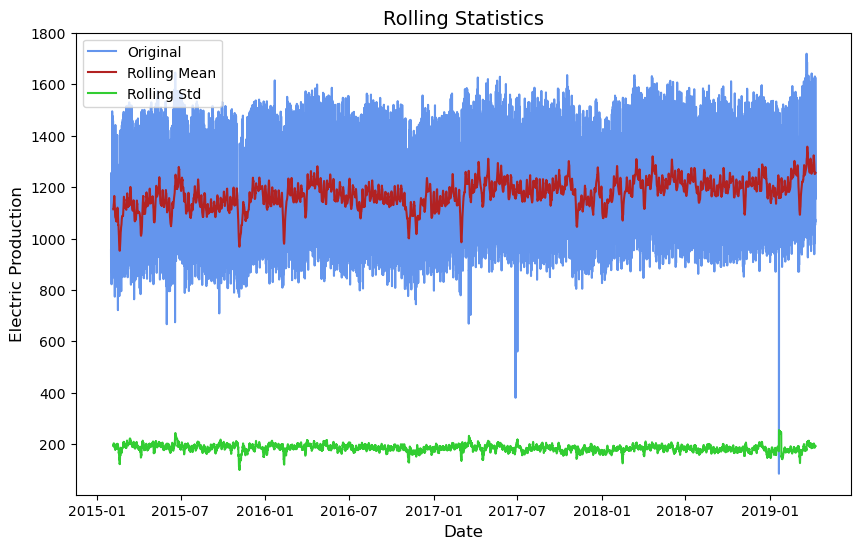

In [5]:
demand_train = train[['DEMAND']]
demand_test = test[["DEMAND"]]

daily_demand_train = demand_train.resample('D').sum()
weekly_demand_train = demand_train.resample('W').sum()
monthly_demand_train = demand_train.resample('M').sum()

print(len(daily_demand_train))
print(len(weekly_demand_train))
print(len(monthly_demand_train))

rolling_mean = demand_train.rolling(window=120).mean()
rolling_std = demand_train.rolling(window=120).std()

plt.figure(figsize = (10,6))
plt.plot(demand_train, color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(rolling_std, color='limegreen', label='Rolling Std')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size  = 12)
plt.legend(loc = 'upper left')
plt.title('Rolling Statistics', size = 14)
plt.show()




From the plot above, we see that there are patterns consistent and repeated over time, therefore the time series show **strong seasonality**. This includes factors such as higher during demand during certain days of the weeks. We have already talked about the factors that introduces these seasonality in the notebook,  *exploring the dataset*. From the plot, we see that the **the trend seems stable** with the overall demand remaining nearly constant over the years. However, we will perform a strict tests to back that hypothesis. 

Another important thing to notice is how on average the time-series meet the criterion of stationarity despite having such strong seasonality to it since the mean and standard deviation *approximately* remains constant. 



### 2. ACF plot and PACF plot

For this, we use the library statsmodel. 

C:\Users\AWCD\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


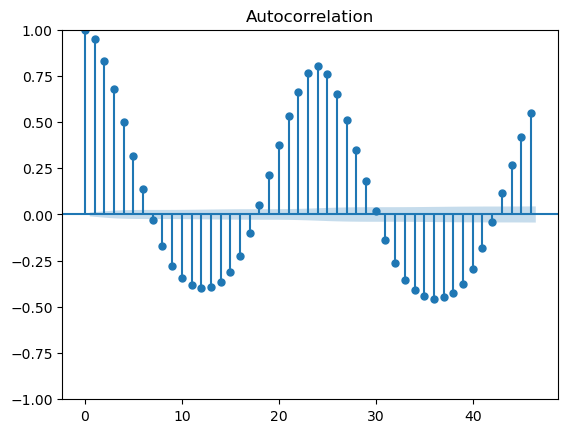

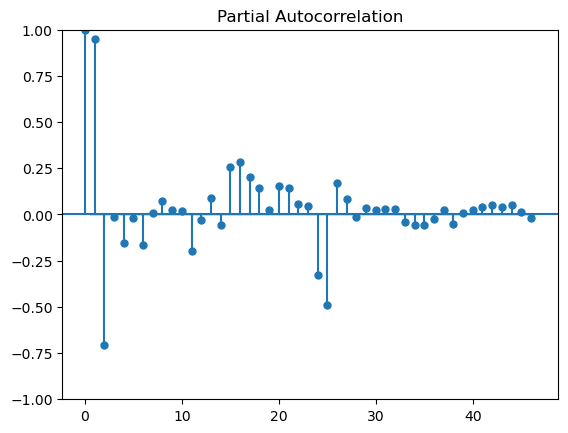

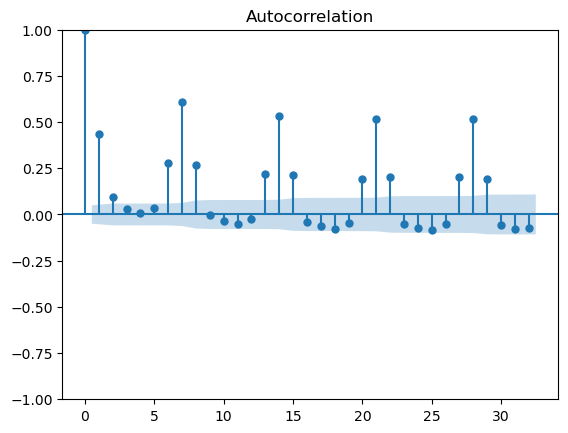

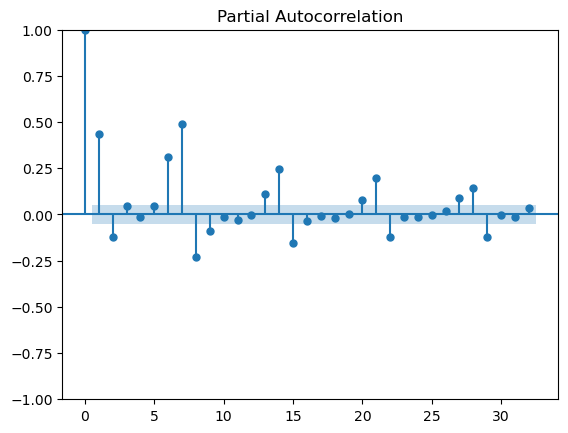

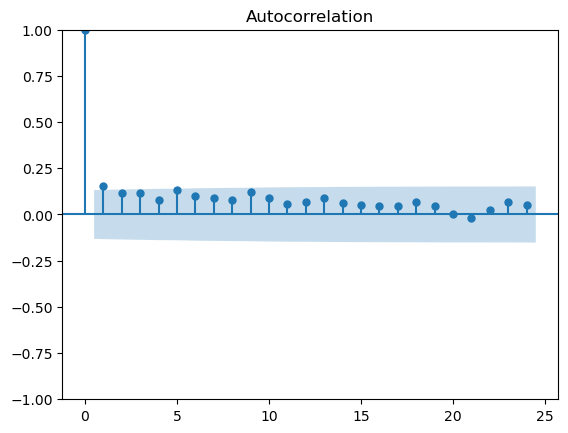

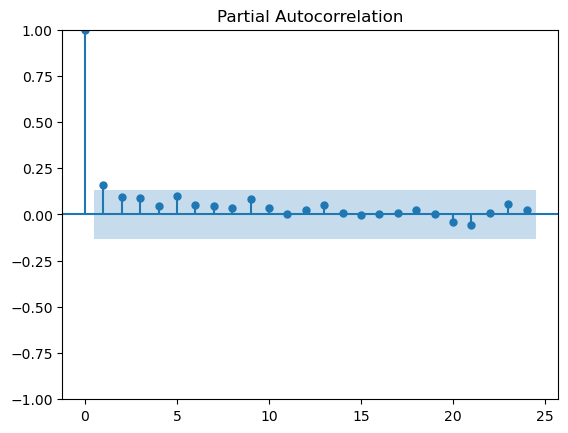

In [6]:
acf_original = plot_acf(demand_train)
pacf_origina = plot_pacf(demand_train)

acf_original = plot_acf(daily_demand_train)
pacf_origina = plot_pacf(daily_demand_train)

acf_original = plot_acf(weekly_demand_train)
pacf_origina = plot_pacf(weekly_demand_train)

Note the peaks at multiples of 24 in the ACF plots for hourly-demand. These suggests strong seasonality and refers to the hourly demand fluctuation of electricity that we saw in the notebook *exploring the dataset* before where the peak was seen at 12 PM and then there was another peak in the middle at around 6 pm. This reveals that if we are going to be predicting on a *weekly basis*, then we will need to incorporporate atleast 14 terms (kind of alot to get a good result). 

From the PACF plot, we see that the most significant lag is the initial one with a sharp decrease thereafter. 


What is interesting to see however is the weekly ACF and PACF plots. Notice how for the weekly ACF and PACF plots, the strongest lags are the initial and then they are completely nullified. This indicates that overall, if we were predicing for a long period of time (which we are not), we would set order of our time series to **q=1** and **p =1** respectively to get good results. 



### 3. ADF Tests

We already talked about the ADF test in passing mention that it would be used to test the stationarity of our time series. Essentially, the ADF test acheives this criterion of stationarity by defining two hypothesis: 

**Null Hypothesis:** Time Series is non-stationary. It gives a time-dependent trend.
**Alternate Hypothesis:** Time Series is stationary. In another term, the series doesn’t depend on time.

**ADF < critical values:** Reject the null hypothesis, time series is stationary.
**ADF > critical values:** Failed to reject the null hypothesis, time series is non-stationary.

In [7]:
adf_test = adfuller(demand_train)

print('ADF Statistic: ', adf_test[0])
print('p-value:' , adf_test[1])

print("##################################")  
print('Critical Values:')
for key, train_dict in adf_test[4].items():
    print(key, train_dict)    
    if adf_test[0] > adf_test[4]["5%"]:
        print("ADF > Critical Values")
        print ("Failed to reject null hypothesis, time series is non-stationary.")
    else:
        print("ADF < Critical Values")
        print ("Reject null hypothesis, time series is stationary.")


ADF Statistic:  -22.38856194817244
p-value: 0.0
##################################
Critical Values:
1% -3.4305283505465916
ADF < Critical Values
Reject null hypothesis, time series is stationary.
5% -2.8616188266471667
ADF < Critical Values
Reject null hypothesis, time series is stationary.
10% -2.566811956927193
ADF < Critical Values
Reject null hypothesis, time series is stationary.


Notice how the value of p is coming to 0 which indicates that the time series is stationarity *despite such strong seasonality*. This is because the test is not well-suited for detecting seasonalities especially when the seasonalities are strong and well-defined (like in our case). Seasonal patterns introduce a predictable, repeating structure to the data, and the ADF test may not effectively capture this type of non-stationarity. This indicates that forget about SRIMA, we can get away with applying ARMA on this and still get good results for this particular time-interval. However, notice that for some of these datasets (especially when we will get to Covid 19, we would have clear trends). Keeping this in mind, it is a good choice to incorporate the I part of ARIMA. Before we do that however, lets create a general function for plotting and ADF test. 

### Creating a general function for ADF test

Since we have a total of 14 sheets, we will actuallly have to carry out ADF test 14 times when we deal with the entire dataset. This motivates us to generalize the above lines of codes to create a single function. Note that the function takes in a notebook with a single column with that column represeting the demand. So when we will be passing our original data we would have to keep that in mind that we will need to preprocess it. 

In [8]:

def adfuller_test(ts, window = 120): # setting default to 5 days average 
  
    adf_test = adfuller(ts)
    print('ADF Statistic: ', adf_test[0])
    print('p-value:' , adf_test[1])
    print("##################################")  
    print('Critical Values:')
    for key, train_dict in adf_test[4].items():
        print(key, train_dict)    
        if adf_test[0] > adf_test[4]["5%"]:
            print("ADF > Critical Values")
            print ("Failed to reject null hypothesis, time series is non-stationary.")
        else:
            print("ADF < Critical Values")
            print ("Reject null hypothesis, time series is stationary.")

    

###  ADF tests for all training-test splits 

From running the code below, we see that the following intervals are non-stationary: 
1. Testing interval for first split 
2. Testing interval for third split
3. Testing interval for eigth split
4. Testing interval for eleventh split

Notice how its always the testing intervals that fail to meet the criterion of stationarity. This is because they have less data points so the effect of well-defined seasonality is not that pronounced. 

In [11]:

for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]
    demand_train = train[['DEMAND']]
    demand_test = test[["DEMAND"]]
    print("########################### ADF Results for training-test split: " , i + 1 , "############################")
    print("### STATISTICS FOR TRAINING DATA,  :", i+ 1 , "###")
    adf_test = adfuller_test(demand_train, window = 120)
    print("###################################")
    print("### STATISTICS FOR TEST DATA : ", i+1, "###")
    adf_test = adfuller_test(demand_test, window = 120)
    print("###################################")


########################### ADF Results for training-test split:  1 ############################
### STATISTICS FOR TRAINING DATA,  : 1 ###
ADF Statistic:  -22.38856194817244
p-value: 0.0
##################################
Critical Values:
1% -3.4305283505465916
ADF < Critical Values
Reject null hypothesis, time series is stationary.
5% -2.8616188266471667
ADF < Critical Values
Reject null hypothesis, time series is stationary.
10% -2.566811956927193
ADF < Critical Values
Reject null hypothesis, time series is stationary.
###################################
### STATISTICS FOR TEST DATA :  1 ###
ADF Statistic:  -1.487442632127171
p-value: 0.5397138912261426
##################################
Critical Values:
1% -3.473829775724492
ADF > Critical Values
Failed to reject null hypothesis, time series is non-stationary.
5% -2.880622899711496
ADF > Critical Values
Failed to reject null hypothesis, time series is non-stationary.
10% -2.5769448985432954
ADF > Critical Values
Failed to reject nu

ADF Statistic:  -21.33898818561918
p-value: 0.0
##################################
Critical Values:
1% -3.4305031113749727
ADF < Critical Values
Reject null hypothesis, time series is stationary.
5% -2.8616076718287835
ADF < Critical Values
Reject null hypothesis, time series is stationary.
10% -2.5668060195206515
ADF < Critical Values
Reject null hypothesis, time series is stationary.
###################################
### STATISTICS FOR TEST DATA :  9 ###
ADF Statistic:  -4.480320143773096
p-value: 0.0002133831341535163
##################################
Critical Values:
1% -3.4703698981001665
ADF < Critical Values
Reject null hypothesis, time series is stationary.
5% -2.8791138497902193
ADF < Critical Values
Reject null hypothesis, time series is stationary.
10% -2.576139407751488
ADF < Critical Values
Reject null hypothesis, time series is stationary.
###################################
########################### ADF Results for training-test split:  10 ##########################

### Stabilizing the Data using Logarithmic transformation and rolling averages

Firstly, since the data exhibits such extremely periodicity we need to perform rolling averages. This will help us in the eventual decomposition. 

Secondly, since The data exhibits hight variance due to weekly seasonality of demand. Lets see if Logarithmic transformation takes care of this.  To implement this, we use the Box-Cox transform which is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms. 

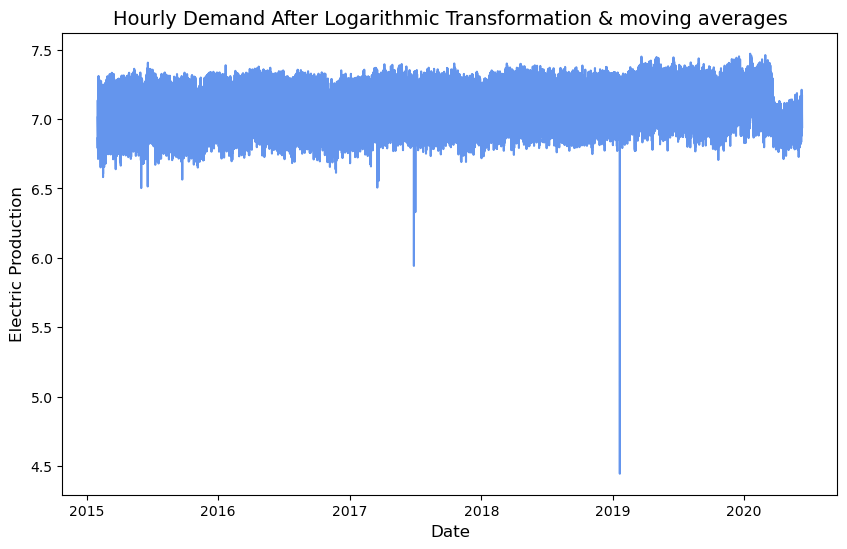

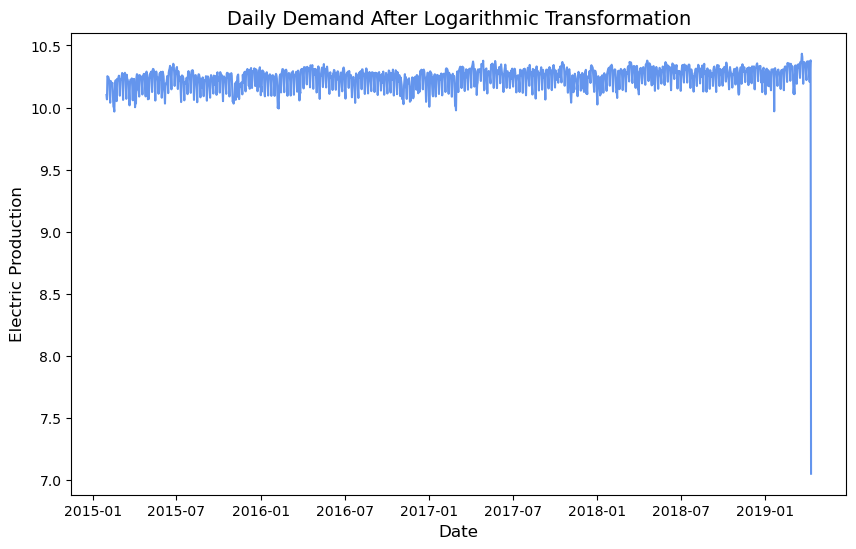

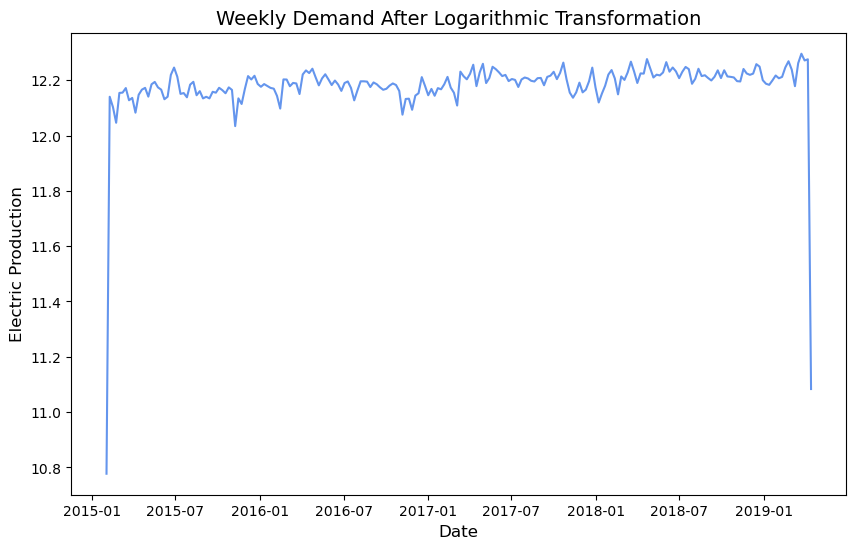

In [12]:

demand_log_scaled = demand_train.copy()
demand_log_scaled_test = demand_test.copy()

demand_log_scaled['DEMAND'] = boxcox(demand_log_scaled['DEMAND'], lmbda=0.0)
demand_log_scaled_test['DEMAND'] = boxcox(demand_log_scaled_test['DEMAND'], lmbda=0.0)

plt.figure(figsize = (10,6))
plt.plot(demand_log_scaled, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Hourly Demand After Logarithmic Transformation & moving averages", size = 14)
plt.show()


daily_demand_log_scaled = daily_demand_train.copy()

daily_demand_log_scaled['DEMAND'] = boxcox(daily_demand_train['DEMAND'], lmbda=0.0)
plt.figure(figsize = (10,6))
plt.plot(daily_demand_log_scaled, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Daily Demand After Logarithmic Transformation", size = 14)
plt.show()


weekly_demand_log_scaled = weekly_demand_train.copy()

weekly_demand_log_scaled['DEMAND'] = boxcox(weekly_demand_train['DEMAND'], lmbda=0.0)
plt.figure(figsize = (10,6))
plt.plot(weekly_demand_log_scaled, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Weekly Demand After Logarithmic Transformation", size = 14)
plt.show()


### Performing the 'I' in ARIMA
Although it appears as though the data above does not have any trend, there is actually a **slightly increasing trend**, which only becomes obvious after we perform differences and see how flat the actual data without the trend is. 

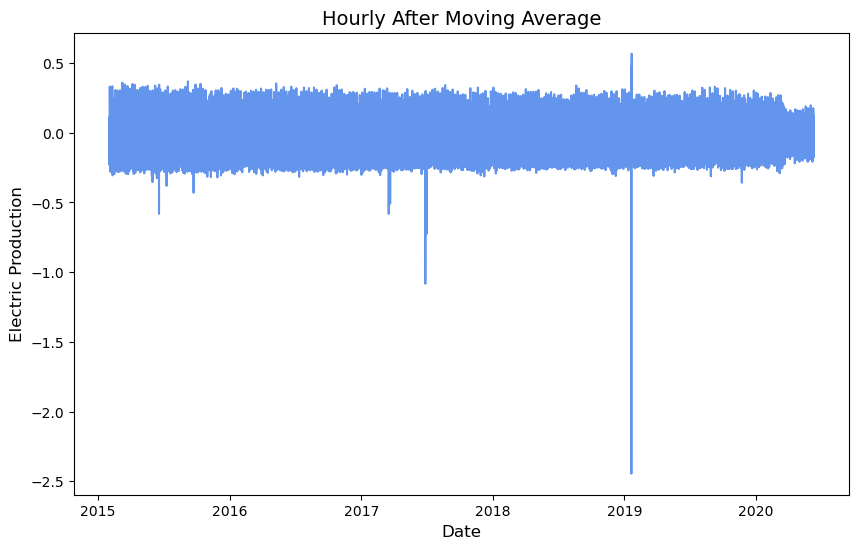

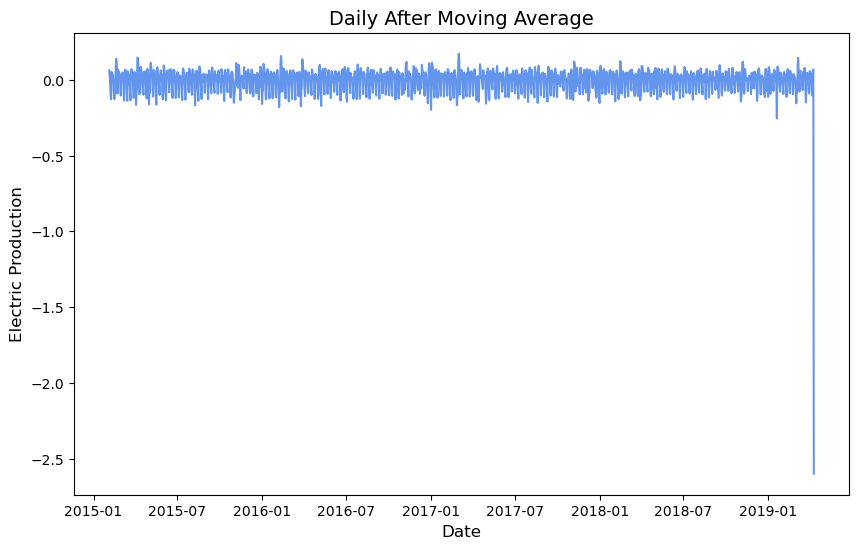

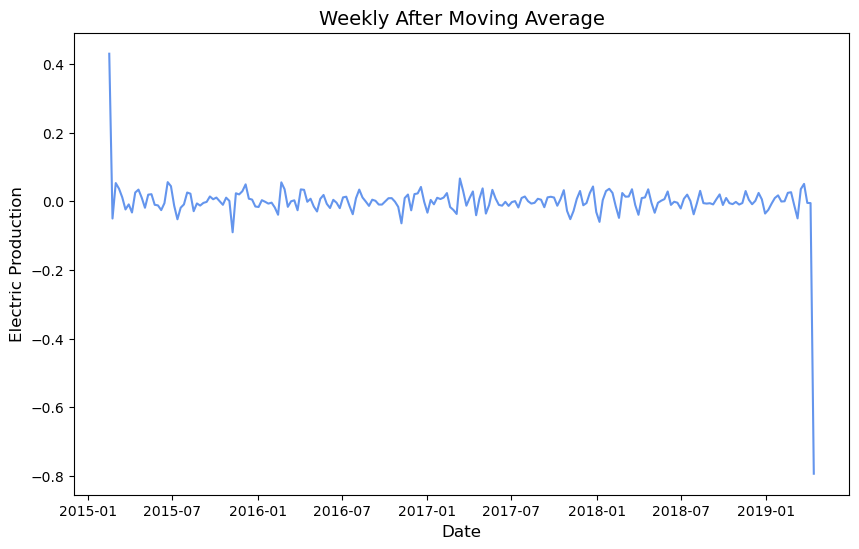

In [13]:

moving_avg = demand_log_scaled.rolling(window=24).mean()
demand_log_scaled_ma = demand_log_scaled - moving_avg
demand_log_scaled_ma.dropna(inplace=True)

## THERE IS ONLY 168 DATAPOINTS. I don't wanna remove 24 valualabe data points by taking moving averages... 
demand_log_scaled_ma_test = demand_log_scaled_test

plt.figure(figsize = (10,6))
plt.plot(demand_log_scaled_ma, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Hourly After Moving Average", size = 14)
plt.show()


daily_moving_avg = daily_demand_log_scaled.rolling(window=5).mean()
daily_demand_log_scaled_ma = daily_demand_log_scaled - daily_moving_avg
daily_demand_log_scaled_ma.dropna(inplace=True)
plt.figure(figsize = (10,6))
plt.plot(daily_demand_log_scaled_ma, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Daily After Moving Average", size = 14)
plt.show()

weekly_moving_avg = weekly_demand_log_scaled.rolling(window=3).mean()
weekly_demand_log_scaled_ma = weekly_demand_log_scaled - weekly_moving_avg
weekly_demand_log_scaled_ma.dropna(inplace=True)
plt.figure(figsize = (10,6))
plt.plot(weekly_demand_log_scaled_ma, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Weekly After Moving Average", size = 14)
plt.show()

### Performing Exponential Decay transformation: 

An exponential decay transformation is often used to stabilize variance or make the patterns in the data more apparent.It helps stabilize variance and emphasize patterns more evident in the transformed data. It is **critical** to perform if we are to ensure that correct trend, seasonality and residue is picked in the decomposition. 
To do this, we use exponential moving average. 

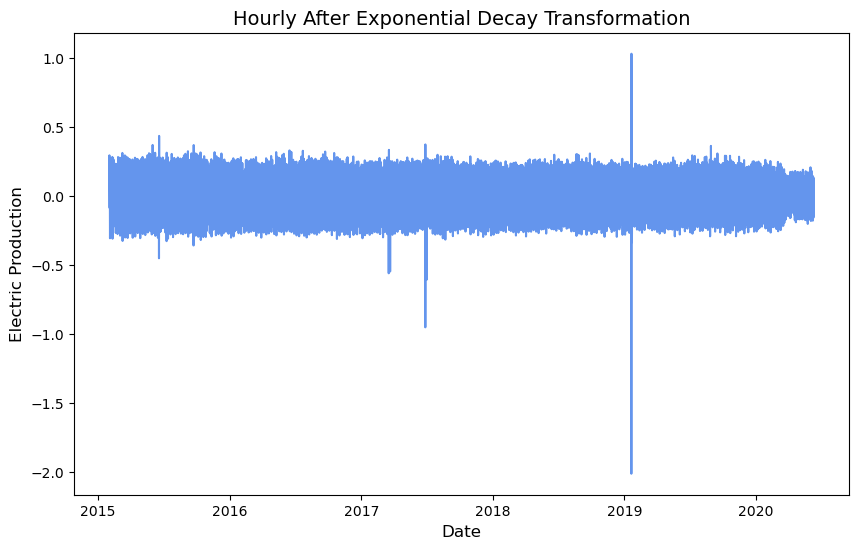

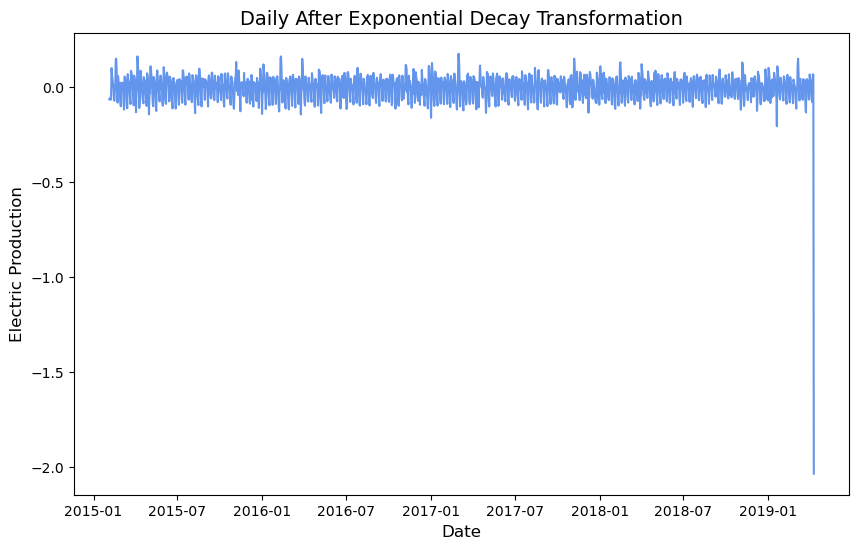

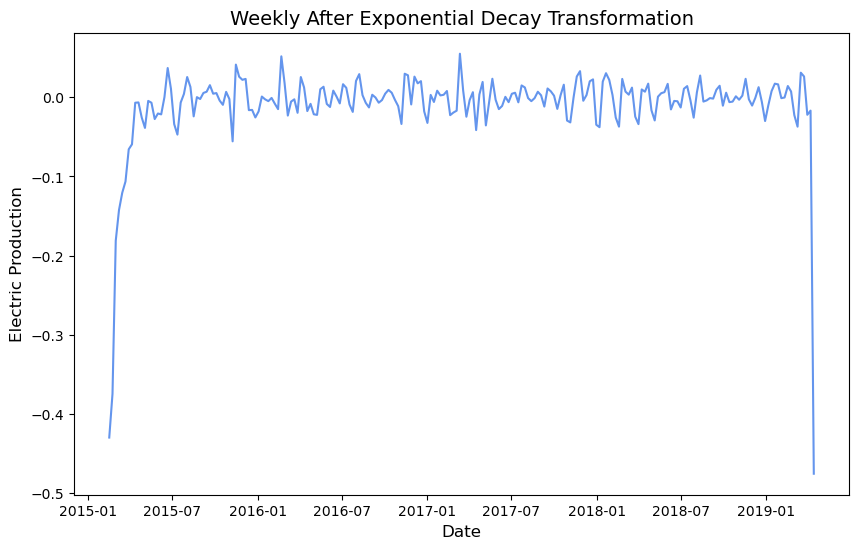

In [14]:

demand_log_scaled_ma_ed = demand_log_scaled_ma.ewm(halflife=12, min_periods=0, adjust=True).mean()
exp_dec = demand_log_scaled_ma - demand_log_scaled_ma_ed

demand_log_scaled_ma_ed_test = demand_log_scaled_ma_test.ewm(halflife=12, min_periods=0, adjust=True).mean()
exp_dec_test = demand_log_scaled_ma_test - demand_log_scaled_ma_ed_test

plt.figure(figsize = (10,6))
plt.plot(exp_dec - demand_log_scaled_ma_ed, color='cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Hourly After Exponential Decay Transformation", size = 14)
plt.show()


daily_demand_log_scaled_ma_ed = daily_demand_log_scaled_ma.ewm(halflife=6, min_periods=0, adjust=True).mean()
daily_exp_dec = daily_demand_log_scaled_ma - daily_demand_log_scaled_ma_ed
plt.figure(figsize = (10,6))
plt.plot(daily_exp_dec - daily_demand_log_scaled_ma_ed, color='cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Daily After Exponential Decay Transformation", size = 14)
plt.show()


weekly_demand_log_scaled_ma_ed = weekly_demand_log_scaled_ma.ewm(halflife=3, min_periods=0, adjust=True).mean()
weekly_exp_dec = weekly_demand_log_scaled_ma - weekly_demand_log_scaled_ma_ed
plt.figure(figsize = (10,6))
plt.plot(weekly_exp_dec - weekly_demand_log_scaled_ma_ed, color='cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("Weekly After Exponential Decay Transformation", size = 14)
plt.show()

### Performing Time Series Decomposition: 

We use from statsmodels.tsa.seasonal import seasonal_decompose to perform this decomposition. The reason why I have plotted all the values of demand from daily, weekly all the way to monthly basis is because this clearly shows decomposition at all the scales. Each of our decomposition picks up something unique. Note that the initial hourly seasonlity shows the entire plot filled because of the extreme periodicity. On the other hand, for the daily, we can still not distinguish any pattern due to high periodicity. Only when we perform a weekly analysis on the data do we get a physically meaningful decomposition that we can use to associate causes with the data. 


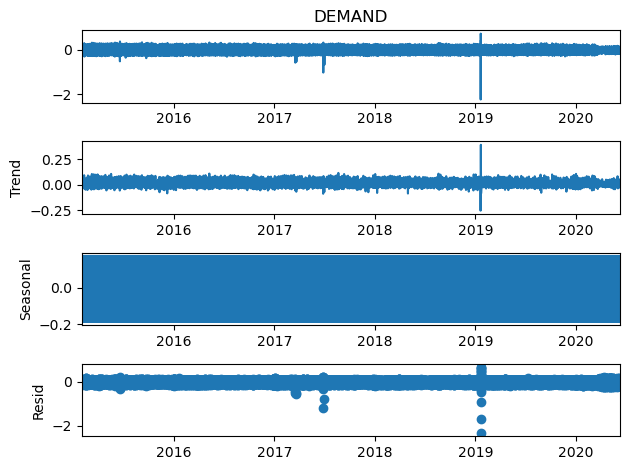

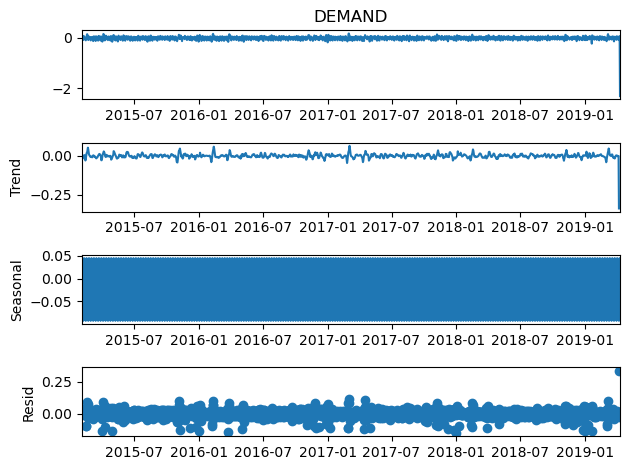

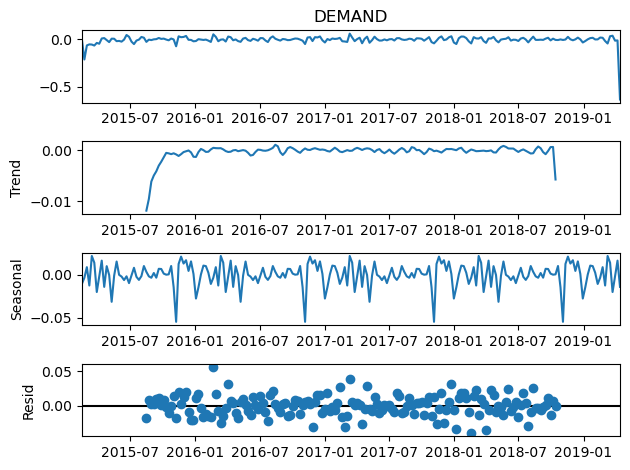

In [15]:

df_seasonal_decompose = seasonal_decompose(exp_dec["DEMAND"], 
                                           model='duplicative')
df_seasonal_decompose.plot()
plt.show()


df_seasonal_decompose = seasonal_decompose(daily_exp_dec["DEMAND"], 
                                           model='duplicative')
df_seasonal_decompose.plot()
plt.show()

df_seasonal_decompose = seasonal_decompose(weekly_exp_dec["DEMAND"], 
                                           model='duplicative')
df_seasonal_decompose.plot()
plt.show()

## Relevant Loss Functions: 

In [16]:
#copying all the relevent loss functions. we already made them when exploring the dataset.  

#######################implementing Mape ################################
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

########################implementing RMSE ##############################

def root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

#################### implementing Peak Load ############################

def peak_load_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    peak_load_true = np.max(y_true)
    plape = np.abs((peak_load_true - np.max(y_pred)) / peak_load_true) * 100
    return plape

################## implementing Valey load ##############################

def value_load_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    peak_min_true = np.min(y_true)
    vlape = np.abs((peak_min_true - np.min(y_pred)) / peak_min_true) * 100
    return vlape


################# implementing Energy absolute percent error #############


def energy_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    total_energy_true = np.sum(y_true)
    total_energy_pred = np.sum(y_pred)
    eape = np.abs((total_energy_true - total_energy_pred) / total_energy_true) * 100
    
    return eape

### Implementing Persistence Model with transformed data & original data: 

We will now implement persistence model. As explained in the theory, this means that the output value would just become the associated value before it. For example, if the Demand has the values [0.0, 0.017, 0.025,0.02, 0.03], then the predicted values would just become [NaN, 0, 0.017, 0.025, 0.02,0.03]. So essentially we have shifted our original data and shifted it by f(x-h) so a shift towards right.  

In [17]:

hour_val = pd.DataFrame(exp_dec.values)
print(exp_dec.head())

persistence = pd.concat([hour_val.shift(1), hour_val], axis=1) #this is according to the equation y_{t+1} = y_{t} we talked about
persistence.columns = ['t-1', 't+1'] #we now have two columns, one consisting of t - 1 and one of t + 1
persistence = persistence.fillna(0) # ensuring we have no zero values. 
per_values = persistence.values# transfering to numpy
X_train = per_values[:,0]
y_train = per_values[:,1]
print(len(X_train))
print(len(y_train))


hour_val_test = pd.DataFrame(exp_dec_test.values)
persistence_test = pd.concat([hour_val_test.shift(1), hour_val_test], axis=1) #this is according to the equation y_{t+1} = y_{t} we talked about
persistence_test.columns = ['t-1', 't+1'] #we now have two columns, one consisting of t - 1 and one of t + 1
persistence_test = persistence_test.fillna(0)
per_values_test = persistence_test.values
X_test = per_values_test[:,0]
y_test = per_values_test[:,1]


"""
####Predictions on training data: 
predictions = []
for i in X_train:
    y_pred = X_train[i]
    predictions.append(X_train)

persistence_score = mean_squared_error(y_train, predictions)
print('Persistence MSE on train: {}'.format(round(persistence_score,4)))

"""


#######Predictions on test data for transformed data: 
predictions = []
for i in range(len(X_test)):
    y_pred = X_test[i]
    predictions.append(y_pred)

persistence_score = mean_squared_error(y_test, predictions)
print("Mean Squared Error Score for transformed data ",  persistence_score)
###############################


hour_val_1 = pd.DataFrame(demand_train.values)

persistence_1 = pd.concat([hour_val_1.shift(1), hour_val_1], axis=1) #this is according to the equation y_{t+1} = y_{t} we talked about
persistence_1.columns = ['t-1', 't+1'] #we now have two columns, one consisting of t - 1 and one of t + 1
persistence_1 = persistence_1.fillna(0) # ensuring we have no zero values. 
per_values_1 = persistence_1.values# transfering to numpy
X_train_1 = per_values_1[:,0]
y_train_1 = per_values_1[:,1]
print(len(X_train_1))
print(len(y_train_1))


hour_val_test_1 = pd.DataFrame(demand_test.values)
persistence_test_1 = pd.concat([hour_val_test_1.shift(1), hour_val_test_1], axis=1) #this is according to the equation y_{t+1} = y_{t} we talked about
persistence_test_1.columns = ['t-1', 't+1'] #we now have two columns, one consisting of t - 1 and one of t + 1
persistence_test_1 = persistence_test_1.fillna(0)
per_values_test_1 = persistence_test_1.values
X_test_1 = per_values_test_1[:,0]
y_test_1 = per_values_test_1[:,1]

#######Predictions on test data for original data ########################
predictions_1 = []
for i in range(len(X_test_1)):
    y_pred_1 = X_test_1[i]
    predictions_1.append(y_pred_1)

persistence_score_1 = mean_squared_error(y_test_1, predictions_1)
print("Mean Squared Error Score for original data ",  persistence_score_1)

############################################################################



##### Evaluation metrics for original data #################################

mape_score = mean_absolute_percentage_error(y_test_1, predictions_1)
rmse_score = root_mean_squared_error(y_test_1, predictions_1)
plape_score = peak_load_absolute_percentage_error(y_test_1, predictions_1)
vlape_score = value_load_absolute_percentage_error(y_test_1, predictions_1)
eape_score = energy_absolute_percentage_error(y_test_1, predictions_1)

print("Metrics for Original Data:")
print("MAPE: ", mape_score)
print("RMSE:", rmse_score)
print("PLAPE:", plape_score)
print("VLAPE:", vlape_score)
print("EAPE:", eape_score)

############################################################################


                       DEMAND
datetime                     
2015-02-01 00:00:00  0.000000
2015-02-01 01:00:00 -0.017433
2015-02-01 02:00:00 -0.025172
2015-02-01 03:00:00 -0.027159
2015-02-01 04:00:00 -0.033515
46945
46945
Mean Squared Error Score for transformed data  0.0015620576582347368
46968
46968
Mean Squared Error Score for original data  8125.341029596904
Metrics for Original Data:
MAPE:  3.76
RMSE: 90.14067355859343
PLAPE: 0.0
VLAPE: 100.0
EAPE: 0.5662975128312843


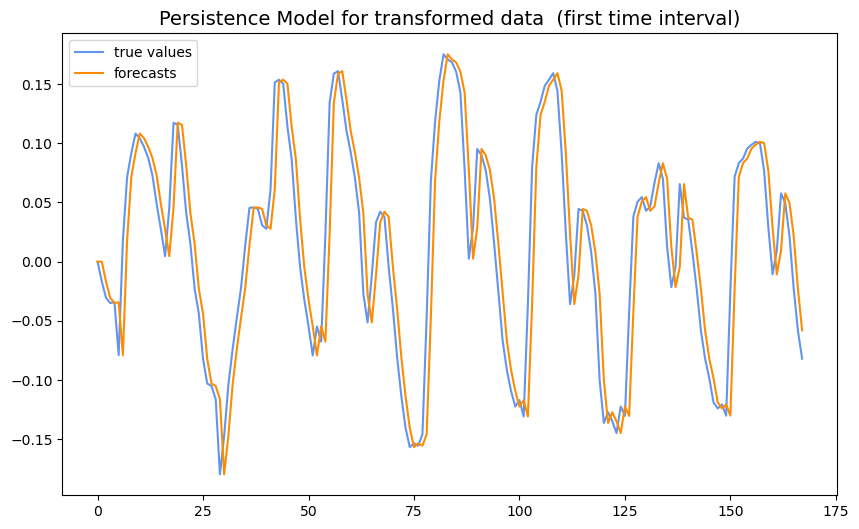

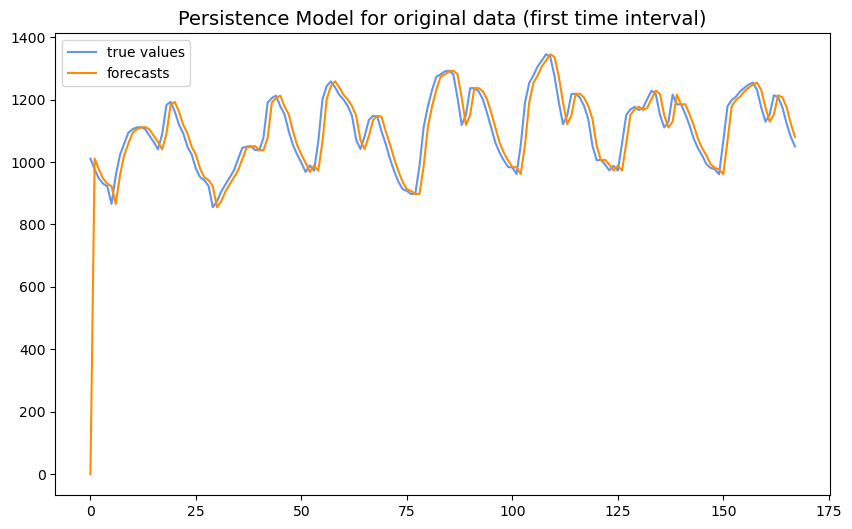

In [18]:
plt.figure(figsize = (10,6))
plt.plot(y_test, label = "true values", color = "cornflowerblue")
plt.plot(predictions,label = "forecasts", color='darkorange')
plt.title("Persistence Model for transformed data  (first time interval)", size = 14)
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize = (10,6))
plt.plot(y_test_1, label = "true values", color = "cornflowerblue")
plt.plot(predictions_1,label = "forecasts", color='darkorange')
plt.title("Persistence Model for original data (first time interval)", size = 14)
plt.legend(loc = 'upper left')
plt.show()

#### Persistence Model for the entire dataset

The persistence model for the entire dataset would be a bit different from the other models in the sense that it would only 
incorporate only the particular time intervals for which we are training our models and not any other timeframe. As such, we will create the model using only the test_dictionary. 

In [19]:
mse_persist = []
mape_persist = []
rmse_persist = []
plape_persist = []
vlape_persist = []
eape_persist = []


for i in range(len(keys)):
    test = test_dict[keys[i]]
    demand_test = test[["DEMAND"]]
    
    hour_val_test = pd.DataFrame(demand_test.values)
    persistence_test = pd.concat([hour_val_test.shift(1), hour_val_test], axis=1)
    persistence_test.columns = ['t-1', 't+1']
    persistence_test = persistence_test.fillna(0)
    per_values_test = persistence_test.values
    X_test = per_values_test[:, 0]
    y_test = per_values_test[:, 1]
    
    predictions = [X_test[0]]  
    for i in range(1, len(X_test)):
        y_pred = X_test[i - 1]
        predictions.append(y_pred)

    
    hour_val = pd.DataFrame(demand_train.values)
    persistence = pd.concat([hour_val.shift(1), hour_val], axis=1) #this is according to the equation y_{t+1} = y_{t} we talked about
    persistence.columns = ['t-1', 't+1'] #we now have two columns, one consisting of t - 1 and one of t + 1
    persistence = persistence.fillna(0)
    per_values = persistence.values
    X_test = per_values_test[:,0]
    y_test = per_values_test[:,1]
    predictions = []
    for i in range(len(X_test)):
        y_pred = X_test[i]
        predictions.append(y_pred)
    mse = mean_squared_error(y_test, predictions)

    mse = mean_squared_error(y_test, predictions)
    mape_score = mean_absolute_percentage_error(y_test, predictions)
    rmse_score = root_mean_squared_error(y_test, predictions)
    plape_score = peak_load_absolute_percentage_error(y_test, predictions)
    vlape_score = value_load_absolute_percentage_error(y_test, predictions)
    eape_score = energy_absolute_percentage_error(y_test, predictions)

    mse_persist.append(mse)
    mape_persist.append(mape_score)
    rmse_persist.append(rmse_score)
    plape_persist.append(plape_score)
    vlape_persist.append(vlape_score)
    eape_persist.append(eape_score)



print("Metrics:")
print("MSE: ", mse_persist)
print("MAPE: ", mape_persist)
print("RMSE:", rmse_persist)
print("PLAPE:", plape_persist)
print("VLAPE:", vlape_persist)
print("EAPE:", eape_persist)



Metrics:
MSE:  [11283.49167798113, 11025.823970919939, 12030.922751983335, 10479.08472827875, 8970.746734870356, 10045.66254748601, 9973.803557037321, 9181.12677094625, 11362.878128285238, 9476.150207490417, 11228.352244119704, 10928.860613734285, 8177.672984632202, 8125.341029596904]
MAPE:  [4.03, 4.33, 4.23, 4.27, 4.44, 4.31, 4.36, 4.19, 4.0, 4.13, 4.11, 4.29, 3.63, 3.76]
RMSE: [106.22378113200985, 105.00392359773961, 109.68556309735267, 102.36740071076706, 94.714026072543, 100.22805269726639, 99.86893189094054, 95.81819645008066, 106.59680167943706, 97.34551970938578, 105.96391953924554, 104.54119099060564, 90.43048703082496, 90.14067355859343]
PLAPE: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
VLAPE: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
EAPE: [0.5090580643053068, 0.5188567643264314, 0.5347551326880278, 0.4915010775015548, 0.5497655999458931, 0.5355929382544178, 0.5119587699719189, 0.60042663553

### Autoregression Model 

#### 1. Using arbitrary lags

We can calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use. This is what we will do in one case. The features we will use are the following ofcourse: 

1. week_X-2
2. week_X-3
3. week_X-4

Before that however we will the statsmodels libraries' autoregression model where we must specify an appropriate lag value and train a linear regression model. Note that we could have done this by using just ARIMA since AR is just a particular case of ARIMA. But for completeness we have important AR. 

Mean Squared Error (MSE): 0.006874482732102227


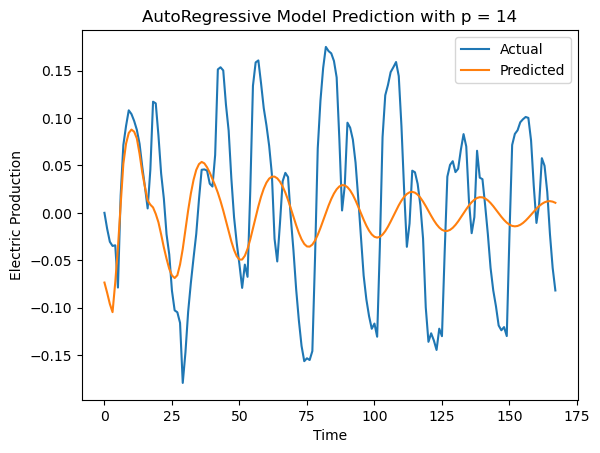

In [20]:
train_data = exp_dec.values
test_data = exp_dec_test.values

lag_order = 14  # we talked about when considering Autocorrelation graphs how this is a good value 

model = AutoReg(train_data, lags=lag_order)
fit_model = model.fit()

########PREDICTING
predictions = fit_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

###Evaluating the model
mse = mean_squared_error(test_data, predictions)
print('Mean Squared Error (MSE):', mse)

# Plot the predictions against the actual values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('AutoRegressive Model Prediction with p = 14')
plt.show()




#### 2. Using the specified lags present in the dataset. 

Let us now use the specified lags: 

1. week_X-2
2. week_X-3
3. week_X-4

We are essentially working with AR(3) model: 

 $$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} +  \phi_3 X_{t-3} + \varepsilon_t$$

This is essentially a linear regression problem where we are attempting to find the variables $\phi_1$ , $\phi_2$, $\phi_3$
We use the OLS method from stats-api model to perform linear regression and then just fit it onto our test data. Notice that physically we would have data week_X-3, week_X-4, week_X-2 when making predictions on Y so there is nothing unphysical about it. 

Metrics for Original Data:
Mean Squared Error (MSE): 3192.085198038062
MAPE:  10.9
RMSE: 146.09806907837205
PLAPE: 6.752638021136141
VLAPE: 5.466631333307339
EAPE: 1.266220160691225


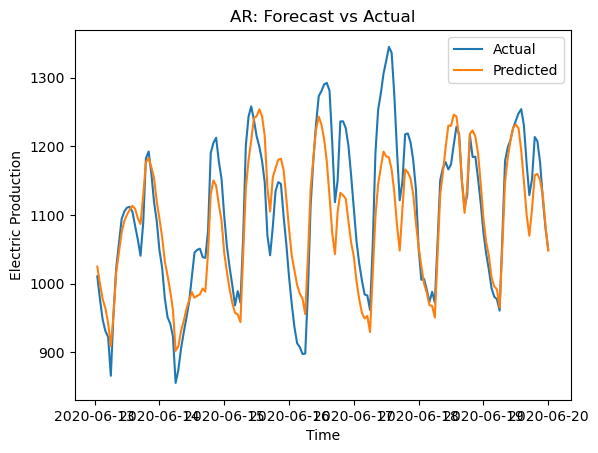

In [21]:
X_train = train[['week_X-2', 'week_X-3', 'week_X-4']]
y_train = train['DEMAND']

X_train = sm.add_constant(X_train) ##adds the constant term in the regression model as shown in the equation above 

model = sm.OLS(y_train, X_train) 
result = model.fit()

#print(result.summary())

X_test = test[['week_X-2', 'week_X-3', 'week_X-4']]
y_test = test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)




"""
##################################################################################################################
######################################## EVALUATING THE MODEL#####################################################
##################################################################################################################
"""
mse_AR = mean_squared_error(y_test, y_pred)
mape_score = mean_absolute_percentage_error(y_test, y_pred)
rmse_score = root_mean_squared_error(y_test, y_pred)
plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
eape_score = energy_absolute_percentage_error(y_test, y_pred)

print("Metrics for Original Data:")
print('Mean Squared Error (MSE):', mse_AR)
print("MAPE: ", mape_score)
print("RMSE:", rmse_score)
print("PLAPE:", plape_score)
print("VLAPE:", vlape_score)
print("EAPE:", eape_score)


"""
##################################################################################################################
################################ Plotting y_pred vs y_actual #####################################################
##################################################################################################################
"""

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('AR: Forecast vs Actual')
plt.show()




### Autoregression Model for the Entire Dataset 

Note that in all these, the data is already split in the Walking-Forward Manner, so we need not incorporate anything new. 

In [22]:
mse_AR = []
mape_AR = []
rmse_AR = []
plape_AR = []
vlape_AR = []
eape_AR = []



for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]
    
    X_train = train[['week_X-2', 'week_X-3', 'week_X-4']]
    y_train = train['DEMAND']
    X_train = sm.add_constant(X_train) 
    model = sm.OLS(y_train, X_train) 
    result = model.fit()
    
    X_test = test[['week_X-2', 'week_X-3', 'week_X-4']]
    y_test = test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)
    
    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_AR.append(mse_score)
    mape_AR.append(mape_score)
    rmse_AR.append(rmse_score)
    plape_AR.append(plape_score)
    vlape_AR.append(vlape_score)
    eape_AR.append(eape_score)



print("Metrics:")
print("MSE: ", mse_AR) #first value aligns with what we found so code is fine
print("MAPE: ", mape_AR)
print("RMSE:", rmse_AR)
print("PLAPE:", plape_AR)
print("VLAPE:", vlape_AR)
print("EAPE:", eape_AR)



Metrics:
MSE:  [17380.727160978335, 3317.105070288203, 11064.838711572616, 5316.613176423607, 4316.972038651969, 3438.370800289597, 3430.6629013284264, 15572.53896164393, 19272.95507362529, 11612.870092672176, 2679.216981348562, 5322.58548981224, 5305.606480534853, 3192.085198038062]
MAPE:  [17.22, 16.37, 16.0, 15.59, 17.29, 17.27, 17.62, 18.75, 17.01, 17.03, 16.13, 16.22, 10.65, 10.9]
RMSE: [263.6352813913797, 246.69347862463385, 268.91476219883606, 229.65742222515485, 259.36674004665275, 250.06465282657663, 244.40308708123305, 264.13197493431795, 247.99813539090448, 246.11826931783096, 251.400837608722, 255.03675830328336, 139.16184079576328, 146.09806907837205]
PLAPE: [2.9841914665262474, 2.5131696850627177, 9.675427358237796, 3.8643677996835315, 1.8071242392840599, 1.2476904747025497, 1.8207693857170397, 6.982668621950336, 3.6739676322399433, 0.7073980908217951, 1.6308637166680444, 1.240434830014349, 6.22403214295031, 6.752638021136141]
VLAPE: [4.314734833840829, 5.1257107306126874

## Moving Average Model 

We have the following moving average feature:

1. MA_X-4

We are essentially working with MA(1) model: 

$$ X_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} $$

Where again we need to find $\theta_1$ using linear regression.  



Mean Squared Error (MSE): 3261.046828639793
Metrics for Original Data:
MAPE:  10.9
RMSE: 145.64610534720055
PLAPE: 4.999814854002283
VLAPE: 6.626128938888222
EAPE: 0.6734461837060888


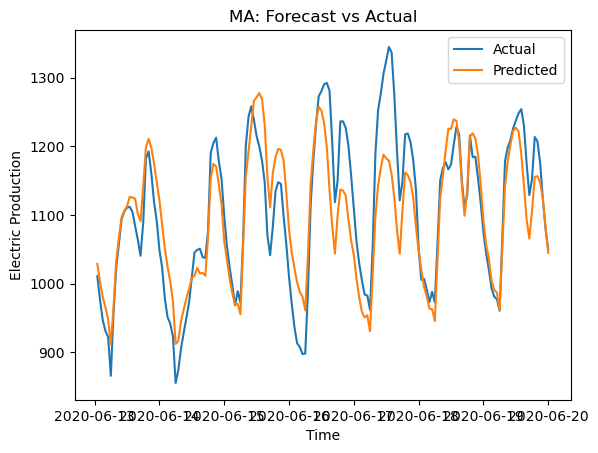

In [23]:
X_train = train[['MA_X-4']]
y_train = train['DEMAND']
X_train = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train) 
result = model.fit()
#print(result.summary())

X_test = test[['MA_X-4']]
y_test = test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)



"""
##################################################################################################################
######################################## EVALUATING THE MODEL#####################################################
##################################################################################################################
"""

mse_MA = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse_MA)

mape_score = mean_absolute_percentage_error(y_test, y_pred)
rmse_score = root_mean_squared_error(y_test, y_pred)
plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
eape_score = energy_absolute_percentage_error(y_test, y_pred)

print("Metrics for Original Data:")
print("MAPE: ", mape_score)
print("RMSE:", rmse_score)
print("PLAPE:", plape_score)
print("VLAPE:", vlape_score)
print("EAPE:", eape_score)

"""
##################################################################################################################
################################ Plotting y_pred vs y_actual #####################################################
##################################################################################################################
"""

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('MA: Forecast vs Actual')
plt.show()




### MA for the entire dataset

In [24]:
mse_MA = []
mape_MA = []
rmse_MA = []
plape_MA = []
vlape_MA = []
eape_MA = []




for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]
    
    X_train = train[['MA_X-4']]
    y_train = train['DEMAND']
    X_train = sm.add_constant(X_train) 
    model = sm.OLS(y_train, X_train) 
    result = model.fit()
    
    X_test = test[['MA_X-4']]
    y_test = test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)


    
    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_MA.append(mse_score)
    mape_MA.append(mape_score)
    rmse_MA.append(rmse_score)
    plape_MA.append(plape_score)
    vlape_MA.append(vlape_score)
    eape_MA.append(eape_score)

"""
##################################################################################################################
################################ Plotting y_pred vs y_actual #####################################################
##################################################################################################################
"""


print("Metrics:")
print("MSE: ", mse_MA) #first value aligns with what we found so code is fine
print("MAPE: ", mape_MA)
print("RMSE:", rmse_MA)
print("PLAPE:", plape_MA)
print("VLAPE:", vlape_MA)
print("EAPE:", eape_MA)



Metrics:
MSE:  [17385.439197735064, 2163.6624992544307, 10630.790272697704, 5596.02827944283, 4038.595247114846, 3277.3222372067817, 3263.8623014549134, 16080.11967296885, 19988.926040238064, 10740.239794159532, 2087.4917815781346, 3171.4286750552205, 5445.85604589464, 3261.046828639793]
MAPE:  [17.36, 16.11, 16.01, 15.74, 17.36, 17.36, 17.96, 18.76, 17.31, 16.9, 16.23, 16.44, 10.68, 10.9]
RMSE: [265.89283621007934, 243.86210844663347, 268.7736804781066, 231.86268845416214, 260.0173505972272, 251.70792450693736, 249.6336449227465, 263.9397792633319, 251.72145984351818, 244.46100082069626, 253.3099817907947, 256.46500923719077, 139.0695031101802, 145.64610534720055]
PLAPE: [3.011787798819309, 1.1612961030639535, 9.462126039931873, 3.474347822919587, 1.6373778293835972, 2.0925283472025913, 2.201291593102599, 6.94395871786881, 4.510398199910848, 0.2677977472697692, 1.3681544082336132, 1.198041401688892, 5.965034243671717, 4.999814854002283]
VLAPE: [3.2235970226199737, 4.129976826820018, 3

## ARMA model 

We now have the following features: 

Let us now use the specified lags: 

1. week_X-2
2. week_X-3
3. week_X-4
4. MA_X-4

The model we are working with is defined as thus: 

$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \phi_3 X_{t-3} + \varepsilon_t + \theta_1 \varepsilon_{t-1} $$

Where p = 3 and q = 1 such that we can define this to be ARMA(3,1)



Mean Squared Error (MSE): 3377.065776858631
Metrics for Original Data:
MAPE:  10.94
RMSE: 145.92978543932523
PLAPE: 4.1672128070277985
VLAPE: 7.067506091298618
EAPE: 0.3292039336043592


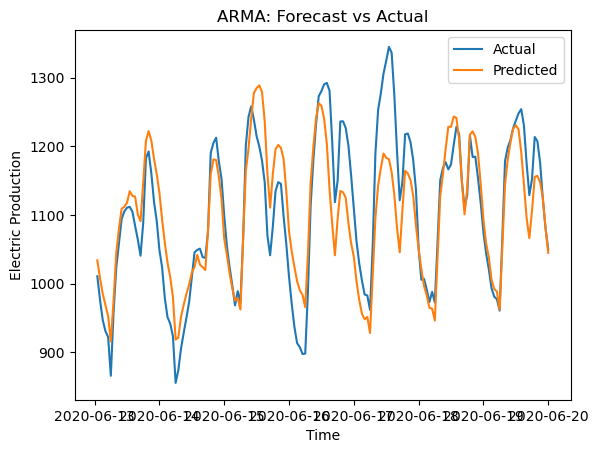

In [25]:
X_train = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_train = train['DEMAND']
X_train = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train) 
result = model.fit()
#print(result.summary())

X_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_test = test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)



"""
##################################################################################################################
######################################## EVALUATING THE MODEL#####################################################
##################################################################################################################
"""

mse_ARMA = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse_ARMA)


mape_score = mean_absolute_percentage_error(y_test, y_pred)
rmse_score = root_mean_squared_error(y_test, y_pred)
plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
eape_score = energy_absolute_percentage_error(y_test, y_pred)

print("Metrics for Original Data:")
print("MAPE: ", mape_score)
print("RMSE:", rmse_score)
print("PLAPE:", plape_score)
print("VLAPE:", vlape_score)
print("EAPE:", eape_score)


"""
##################################################################################################################
################################ Plotting y_pred vs y_actual #####################################################
##################################################################################################################
"""


plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('ARMA: Forecast vs Actual')
plt.show()

### ARMA model for the entire dataset

In [26]:
mse_ARMA = []
mape_ARMA = []
rmse_ARMA = []
plape_ARMA = []
vlape_ARMA = []
eape_ARMA = []



for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]
    
    X_train = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
    y_train = train['DEMAND']
    X_train = sm.add_constant(X_train) 
    model = sm.OLS(y_train, X_train) 
    result = model.fit()
    
    X_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
    y_test = test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)

    
    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_ARMA.append(mse_score)
    mape_ARMA.append(mape_score)
    rmse_ARMA.append(rmse_score)
    plape_ARMA.append(plape_score)
    vlape_ARMA.append(vlape_score)
    eape_ARMA.append(eape_score)



print("Metrics:")
print("MSE: ", mse_ARMA) #first value aligns with what we found so code is fine
print("MAPE: ", mape_ARMA)
print("RMSE:", rmse_ARMA)
print("PLAPE:", plape_ARMA)
print("VLAPE:", vlape_ARMA)
print("EAPE:", eape_ARMA)

Metrics:
MSE:  [17733.687338240503, 2039.9555428071621, 10776.170718932766, 5584.282545213836, 4429.801651749338, 3264.3268654423537, 3139.7337919355446, 16635.195172097643, 20493.100154404983, 10356.7025192273, 1781.6103416730164, 2446.3535048507088, 5614.131601645228, 3377.065776858631]
MAPE:  [17.43, 15.96, 15.97, 15.79, 17.32, 17.4, 18.09, 18.8, 17.42, 16.73, 16.3, 16.57, 10.71, 10.94]
RMSE: [266.8241263886883, 242.3347007659455, 268.1645412042623, 232.44716578956562, 259.2907389230857, 252.3149395841292, 251.75008803610848, 263.97460441167243, 253.1066040729957, 242.6818147207915, 255.02768430796993, 257.6312651798083, 139.0759506139615, 145.92978543932523]
PLAPE: [2.7461755654136675, 0.15629177864822416, 9.433633584809495, 3.5010832109231718, 1.6847676575383526, 2.4214540664671826, 2.12747413951767, 6.335412566972017, 5.018428068747803, 0.24513264824012954, 1.1435097292702567, 1.2051428029176192, 5.654249726525101, 4.1672128070277985]
VLAPE: [3.0853306686707582, 3.680748292023929

## ARIMA model 

We just need to perform differencing. We already saw how this helps remove trend. We will use just firt order differencing so d = 1. Also note that we would need to carry this differecing out for **lagged values** and **moving averages** value.

Note: **It is very important we backtransform our data and only then should we evaluate the results. MAPE cannot be evaluated if we have 0 anywhere in our y_pred. When we subtract, our values become between -50 to 50, which causes MAPE evaluation of infinity if not done carefully.  
 **

datetime
2020-06-13 06:00:00     865.5554
2020-06-13 07:00:00     957.0903
2020-06-13 08:00:00    1022.7500
2020-06-13 09:00:00    1059.0593
2020-06-13 10:00:00    1093.9261
                         ...    
2020-06-19 20:00:00    1207.3977
2020-06-19 21:00:00    1175.9687
2020-06-19 22:00:00    1123.2326
2020-06-19 23:00:00    1080.3560
2020-06-20 00:00:00    1049.7208
Name: DEMAND, Length: 163, dtype: float64
Metrics for bt Data:
Mean Squared Error (MSE): 741.5792059728212
MAPE:  1.85
RMSE: 27.231951931009668
PLAPE: 3.124623864424478
VLAPE: 0.8286139137570543
EAPE: 0.05092926376829035


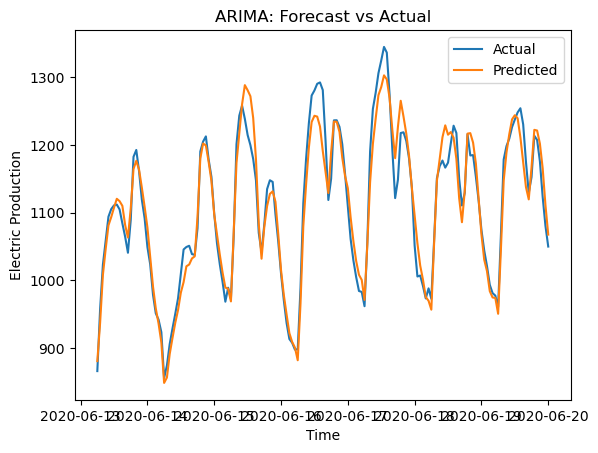

In [27]:
variables = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]

moving_avg = variables.rolling(window=120).mean()
demand_ma = variables - moving_avg
demand_ma.dropna(inplace=True)


variables_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]

moving_avg_test = variables_test.rolling(window=6).mean()
demand_ma_test = variables_test - moving_avg_test
demand_ma_test.dropna(inplace=True)


X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_train = demand_ma['DEMAND']
X_train = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train) 
result = model.fit()
#print(result.summary())

X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_test = demand_ma_test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)



"""
##################################################################################################################
######################################## EVALUATING THE MODEL#####################################################
##################################################################################################################
"""


"""

Note that we need to backtransform our data and only then should we evaluate the results. MAPE cannot be evaluated if we
have 0 anywhere in our y_pred. Keeping this in mind, we add back moving_avg before we evaluate the model.  

"""


y_pred_bt = y_pred + moving_avg_test['DEMAND']
y_pred_bt.dropna(inplace=True)

y_test_bt = y_test['DEMAND'] + moving_avg_test['DEMAND']
y_test_bt.dropna(inplace=True)
print(y_test_bt)

mse_ARIMA_bt = mean_squared_error(y_test_bt, y_pred_bt)
mape_score_bt = mean_absolute_percentage_error(y_test_bt, y_pred_bt)
rmse_score_bt = root_mean_squared_error(y_test_bt, y_pred_bt)
plape_score_bt = peak_load_absolute_percentage_error(y_test_bt, y_pred_bt)
vlape_score_bt = value_load_absolute_percentage_error(y_test_bt, y_pred_bt)
eape_score_bt = energy_absolute_percentage_error(y_test_bt, y_pred_bt)

print("Metrics for bt Data:")
print("Mean Squared Error (MSE):", mse_ARIMA_bt)
print("MAPE: ", mape_score_bt)
print("RMSE:", rmse_score_bt)
print("PLAPE:", plape_score_bt)
print("VLAPE:", vlape_score_bt)
print("EAPE:", eape_score_bt)

"""
##################################################################################################################
######################################## Plotting Prediction vs Actual ###########################################
##################################################################################################################
"""

plt.plot(y_test_bt, label='Actual')
plt.plot(y_pred_bt, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('ARIMA: Forecast vs Actual')
plt.show()


### ARIMA model for the entire dataset 

In [28]:
mse_ARIMA = []
mape_ARIMA = []
rmse_ARIMA = []
plape_ARIMA = []
vlape_ARIMA = []
eape_ARIMA = []





for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]
    variables = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]

    moving_avg = variables.rolling(window=120).mean()
    demand_ma = variables - moving_avg
    demand_ma.dropna(inplace=True)
    
    variables_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]
    moving_avg_test = variables_test.rolling(window=6).mean()
    demand_ma_test = variables_test - moving_avg_test
    demand_ma_test.dropna(inplace=True)
    
    
    X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
    y_train = demand_ma['DEMAND']
    X_train = sm.add_constant(X_train) 
    model = sm.OLS(y_train, X_train) 
    result = model.fit()
    
    

    
    
    X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
    
    y_test = demand_ma_test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)
    
    y_pred = y_pred + moving_avg_test['DEMAND']
    y_pred.dropna(inplace=True)
    
    y_test = y_test['DEMAND'] + moving_avg_test['DEMAND']
    y_test.dropna(inplace=True)
    
    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_ARIMA.append(mse_score)
    mape_ARIMA.append(mape_score)
    rmse_ARIMA.append(rmse_score)
    plape_ARIMA.append(plape_score)
    vlape_ARIMA.append(vlape_score)
    eape_ARIMA.append(eape_score)



print("Metrics:")
print("MSE: ", mse_ARIMA) #first value aligns with what we found so code is fine
print("MAPE: ", mape_ARIMA)
print("RMSE:", rmse_ARIMA)
print("PLAPE:", plape_ARIMA)
print("VLAPE:", vlape_ARIMA)
print("EAPE:", eape_ARIMA)

Metrics:
MSE:  [2291.4692953438253, 626.8206771664051, 643.1659363514659, 744.8451351770885, 467.84416757682516, 521.0792334083499, 530.8945201653673, 2548.211672158148, 2552.2670119038985, 2166.8913336477235, 429.271746599907, 624.7185120079689, 1185.2258203304543, 741.5792059728212]
MAPE:  [2.24, 1.41, 1.39, 1.63, 1.33, 1.31, 1.49, 2.98, 2.79, 2.67, 1.23, 1.48, 2.41, 1.85]
RMSE: [47.8692938671945, 25.036387062961083, 25.36071640059614, 27.29185107641269, 21.629705674761855, 22.82715999436526, 23.0411484124678, 50.47981450201801, 50.519966467763005, 46.549880060508464, 20.718874163426616, 24.994369606132675, 34.42710880004962, 27.231951931009668]
PLAPE: [0.5442639330965542, 1.3574900159536551, 1.8687136979492407, 0.08467385297078421, 2.2207536827350687, 1.2718797377010853, 1.6132558423828796, 1.7900167061732968, 1.562285208849049, 1.1403161970480495, 0.8990760598879476, 0.9565520656903427, 1.33502315616646, 3.124623864424478]
VLAPE: [4.149634976981311, 1.0645794883926332, 0.2024401818

## ARIMAX model 

We can now incorporate all the exogenous variables we have into the dataset. In order for ARIMAX to give better accuracy than ARIMA, you have to note the following important fact: 

**You must subtract the exogenous varaibles from moving averages. That is, you must perform the "I (the process of differencing) in "ARIMAX on exogenous variables. This might seem a bit counterintutive, and I don't get the logic, but it is essential.**

Furthermore, it is not instructive to add all the exogenous variables. That actually reduces the overall accuracy of ARIMAX. Only the important variables used give best result. We have handpicked them by trial and error method. It turns out that two exogenous variables, T2M_toc and hourOfDay are the best for improving the accuracy of ARIMA

Metrics for bt Data:
Mean Squared Error (MSE): 682.682757495331
MAPE:  1.74
RMSE: 26.12819851224594
PLAPE: 2.705407668601142
VLAPE: 0.7157980445992536
EAPE: 0.014895605639260847
Metrics for bt Data for a single exogenous:
Mean Squared Error (MSE): 667.9541224911261
MAPE:  1.71
RMSE: 25.844808424345615
PLAPE: 2.7931583712115624
VLAPE: 0.17944551929375205
EAPE: 0.0335192657793607


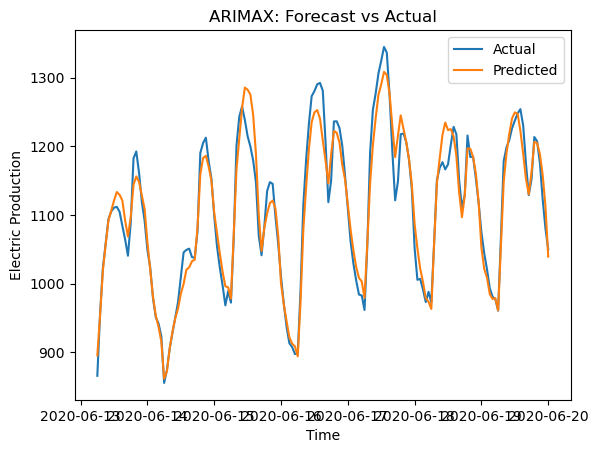

In [29]:
variables = train
moving_avg = variables.rolling(window=120).mean()
demand_ma = variables - moving_avg
demand_ma = demand_ma.fillna(0)



variables_test = test
moving_avg_test = variables_test.rolling(window=6).mean()
demand_ma_test = variables_test - moving_avg_test
demand_ma_test = demand_ma_test.fillna(0)



X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','dayOfWeek', 'weekend', 
                     'holiday', 'Holiday_ID', 'hourOfDay','T2M_toc']]

y_train = demand_ma['DEMAND']
X_train = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train) 
result = model.fit()
#print(result.summary())

X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','dayOfWeek', 'weekend', 
                     'holiday', 'Holiday_ID', 'hourOfDay','T2M_toc' ]]

y_test = demand_ma_test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)


 
#################################### BACKTRANSFORMING ################################################

y_pred_bt = y_pred + moving_avg_test['DEMAND']
y_pred_bt.dropna(inplace=True)

y_test_bt = y_test['DEMAND'] + moving_avg_test['DEMAND']
y_test_bt.dropna(inplace=True)

######################################################################################################


###################################### EVALUATING THE MODEL ###################################

mse_ARIMAX_bt = mean_squared_error(y_test_bt, y_pred_bt)
mape_score_bt = mean_absolute_percentage_error(y_test_bt, y_pred_bt)
rmse_score_bt = root_mean_squared_error(y_test_bt, y_pred_bt)
plape_score_bt = peak_load_absolute_percentage_error(y_test_bt, y_pred_bt)
vlape_score_bt = value_load_absolute_percentage_error(y_test_bt, y_pred_bt)
eape_score_bt = energy_absolute_percentage_error(y_test_bt, y_pred_bt)

print("Metrics for bt Data:")
print("Mean Squared Error (MSE):", mse_ARIMAX_bt)
print("MAPE: ", mape_score_bt)
print("RMSE:", rmse_score_bt)
print("PLAPE:", plape_score_bt)
print("VLAPE:", vlape_score_bt)
print("EAPE:", eape_score_bt)


########################################## Analyzing Individual Impact ######################################
variables1 = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc', 'DEMAND']]
moving_avg1 = variables1.rolling(window=120).mean()
demand_ma1 = variables1 - moving_avg1
demand_ma1 = demand_ma1.fillna(0)

variables_test1 = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc', 'DEMAND']]
moving_avg_test1 = variables_test1.rolling(window=6).mean()
demand_ma_test1 = variables_test1 - moving_avg_test1
demand_ma_test1 = demand_ma_test1.fillna(0)



X_train1 = demand_ma1[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc']]
y_train1 = demand_ma1['DEMAND']
X_train1 = sm.add_constant(X_train1) 
model1 = sm.OLS(y_train1, X_train1) 
result1 = model1.fit()

X_test1 = demand_ma_test1[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc']]

y_test1 = demand_ma_test1[["DEMAND"]]
X_test1 = sm.add_constant(X_test1)
y_pred1 = result1.predict(X_test1)

y_pred_bt1 = y_pred1 + moving_avg_test1['DEMAND']
y_pred_bt1.dropna(inplace=True)

y_test_bt1 = y_test1['DEMAND'] + moving_avg_test1['DEMAND']
y_test_bt1.dropna(inplace=True)


mse_ARIMAX_bt1 = mean_squared_error(y_test_bt1, y_pred_bt1)
mape_score_bt1 = mean_absolute_percentage_error(y_test_bt1, y_pred_bt1)
rmse_score_bt1 = root_mean_squared_error(y_test_bt1, y_pred_bt1)
plape_score_bt1 = peak_load_absolute_percentage_error(y_test_bt1, y_pred_bt1)
vlape_score_bt1 = value_load_absolute_percentage_error(y_test_bt1, y_pred_bt1)
eape_score_bt1 = energy_absolute_percentage_error(y_test_bt1, y_pred_bt1)

print("Metrics for bt Data for a single exogenous:")
print("Mean Squared Error (MSE):", mse_ARIMAX_bt1)
print("MAPE: ", mape_score_bt1)
print("RMSE:", rmse_score_bt1)
print("PLAPE:", plape_score_bt1)
print("VLAPE:", vlape_score_bt1)
print("EAPE:", eape_score_bt1)

#############################################################################################################





"""
##################################################################################################################
################################ Plotting y_pred vs y_actual #####################################################
##################################################################################################################
"""


plt.plot(y_test_bt, label='Actual')
plt.plot(y_pred_bt, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('ARIMAX: Forecast vs Actual')
plt.show()



### ARIMAX model for entire dataset 

In [30]:
mse_ARIMAX = []
mape_ARIMAX = []
rmse_ARIMAX = []
plape_ARIMAX = []
vlape_ARIMAX = []
eape_ARIMAX = []


for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]
    
    variables = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','hourOfDay','T2M_toc', 'DEMAND']]
    moving_avg = variables.rolling(window=120).mean()
    demand_ma = variables - moving_avg
    demand_ma = demand_ma.fillna(0)
    
    variables_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','hourOfDay','T2M_toc', 'DEMAND']]
    moving_avg_test = variables_test.rolling(window=6).mean()
    demand_ma_test = variables_test - moving_avg_test
    demand_ma_test = demand_ma_test.fillna(0)
    
    
    X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','hourOfDay','T2M_toc' ]]
    y_train = demand_ma['DEMAND']
    X_train = sm.add_constant(X_train) 
    model = sm.OLS(y_train, X_train) 
    result = model.fit()
    X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4', 'hourOfDay','T2M_toc' ]]
    y_test = demand_ma_test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)
    
    #################################### BACKTRANSFORMING ################################################
    y_pred = y_pred + moving_avg_test['DEMAND']
    y_pred.dropna(inplace=True)

    y_test = y_test['DEMAND'] + moving_avg_test['DEMAND']
    y_test.dropna(inplace=True)
    ######################################################################################################

    
    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_ARIMAX.append(mse_score)
    mape_ARIMAX.append(mape_score)
    rmse_ARIMAX.append(rmse_score)
    plape_ARIMAX.append(plape_score)
    vlape_ARIMAX.append(vlape_score)
    eape_ARIMAX.append(eape_score)



print("Metrics:")
print("MSE: ", mse_ARIMAX) #first value aligns with what we found so code is fine
print("MAPE: ", mape_ARIMAX)
print("RMSE:", rmse_ARIMAX)
print("PLAPE:", plape_ARIMAX)
print("VLAPE:", vlape_ARIMAX)
print("EAPE:", eape_ARIMAX)

Metrics:
MSE:  [2701.187034158024, 584.6326038133243, 743.3872222204584, 744.4584182966662, 439.9092500286885, 531.1030820695179, 554.9558270421657, 2537.038221043657, 2644.7218246499806, 1978.7759744892217, 330.999074023226, 513.1389525364862, 1029.98828150607, 667.186380607143]
MAPE:  [2.59, 1.39, 1.52, 1.63, 1.34, 1.34, 1.5, 2.98, 2.86, 2.59, 1.13, 1.42, 2.13, 1.71]
RMSE: [51.97294521342834, 24.1791770706392, 27.26512831843009, 27.28476531503737, 20.97401368428772, 23.045673825460558, 23.557500441306708, 50.36902044951497, 51.42685898098367, 44.483434832409486, 18.193379950499192, 22.652570550303693, 32.093430503859665, 25.829951231218825]
PLAPE: [0.21271040083796033, 1.1328847914119093, 1.4442699100523115, 0.487236711085084, 1.406970478593437, 1.6380451497040052, 2.0734292117244566, 1.3074150964610871, 1.1654526853971279, 0.6405557106027052, 0.22012370440704598, 0.2926034412017282, 0.6104966341028351, 2.745661417058813]
VLAPE: [3.193248004886912, 1.795948484299129, 1.23947199175806

## Evaluating the Models: 

In [31]:

print('######################################### MEAN SQUARED ERRORS ###################################################')

print('MSE for AR:', np.mean(mse_AR)) 
print('MSE for MA:', np.mean(mse_MA)) 
print('MSE for ARMA:', np.mean(mse_ARMA)) 
print('MSE for ARIMA :', np.mean(mse_ARIMA)) 
print('MSE for ARIMAX :', np.mean(mse_ARIMAX)) 

print('######################################### MAPE ERRORS ###################################################')

print('MAPE for AR :', np.mean(mape_AR)) 
print('MAPE for MA :', np.mean(mape_MA)) 
print('MAPE for ARMA :', np.mean(mape_ARMA)) 
print('MAPE for ARIMA :', np.mean(mape_ARIMA)) 
print('MAPE for ARIMAX :', np.mean(mape_ARIMAX)) 

print('######################################### RMSE ERRORS ###################################################')

print('RMSE for AR :', np.mean(rmse_AR)) 
print('RMSE for MA :', np.mean(rmse_MA)) 
print('RMSE for ARMA :', np.mean(rmse_ARMA)) 
print('RMSE for ARIMA :', np.mean(rmse_ARIMA)) 
print('RMSE for ARIMAX :', np.mean(rmse_ARIMAX)) 

print('######################################### PLAPE ERRORS ###################################################')

print('PLAPE for AR :', np.mean(plape_AR)) 
print('PLAPE for MA :', np.mean(plape_MA)) 
print('PLAPE for ARMA :', np.mean(plape_ARMA)) 
print('PLAPE for ARIMA :', np.mean(plape_ARIMA)) 
print('PLAPE for ARIMAX :', np.mean(plape_ARIMAX)) 

print('######################################### VLAPE ERRORS ###################################################')

print('VLAPE for AR :', np.mean(vlape_AR)) 
print('VLAPE for MA :', np.mean(vlape_MA)) 
print('VLAPE for ARMA :', np.mean(vlape_ARMA)) 
print('VLAPE for ARIMA :', np.mean(vlape_ARIMA)) 
print('VLAPE for ARIMAX :', np.mean(vlape_ARIMAX)) 

print('######################################### EAPE ERRORS ###################################################')

print('EAPE for AR :', np.mean(eape_AR)) 
print('EAPE for MA :', np.mean(eape_MA)) 
print('EAPE for ARMA :', np.mean(eape_ARMA)) 
print('EAPE for ARIMA :', np.mean(eape_ARIMA)) 
print('EAPE for ARIMAX :', np.mean(eape_ARIMAX)) 



######################################### MEAN SQUARED ERRORS ###################################################
MSE for AR: 7944.510581229135
MSE for MA: 7652.200633817201
MSE for ARMA: 7690.865537505643
MSE for ARIMA : 1148.163161986446
MSE for ARIMAX : 1142.9630104631876
######################################### MAPE ERRORS ###################################################
MAPE for AR : 16.00357142857143
MAPE for MA : 16.080000000000002
MAPE for ARMA : 16.10214285714286
MAPE for ARIMA : 1.8721428571428576
MAPE for ARIMAX : 1.8664285714285713
######################################### RMSE ERRORS ###################################################
RMSE for AR : 236.62009355883293
RMSE for MA : 237.59736235920036
RMSE for ARMA : 237.8967149598793
RMSE for ARIMA : 31.998444858547675
RMSE for ARIMAX : 31.666275026241397
######################################### PLAPE ERRORS ###################################################
PLAPE for AR : 3.6517673903567767
PLAPE for MA : 3.449568221

In [32]:
weeks = ["Week 15 Apr 2019", "Week 21 May 2019", "Week 24 Jun 2019", "Week 29 Jul 2019", "Week 33 Aug 2019", "Week 37 Sep 2019",
         "Week 41 Oct 2019", "Week 44 Nov 2019", "Week 51 Dec 2019", "Week 01 Jan 2020", "Week 06 Feb 2020",
         "Week 10 Mar 2020", "Week 20 May 2020", "Week 24 Jun 2020"]

data_arimax = {
    "Weeks": weeks,
    "MAPE": mape_ARIMAX,
    "RMSE": rmse_ARIMAX,
    "PLAPE": plape_ARIMAX,
    "VLAPE": vlape_ARIMAX,
    "EAPE": eape_ARIMAX,
}

df_arimax = pd.DataFrame(data_arimax)

df_arimax.set_index("Weeks", inplace=True)
display(df_arimax)



,MAPE,RMSE,PLAPE,VLAPE,EAPE
Weeks,,,,,
Week 15 Apr 2019,2.59,51.972945,0.212710,3.193248,0.214849
Week 21 May 2019,1.39,24.179177,1.132885,1.795948,0.004876
Week 24 Jun 2019,1.52,27.265128,1.444270,1.239472,0.001950
Week 29 Jul 2019,1.63,27.284765,0.487237,1.075381,0.142311
Week 33 Aug 2019,1.34,20.974014,1.406970,1.617713,0.186828
Week 37 Sep 2019,1.34,23.045674,1.638045,0.817845,0.034207
Week 41 Oct 2019,1.50,23.557500,2.073429,1.431732,0.138443
Week 44 Nov 2019,2.98,50.369020,1.307415,0.556188,0.183595
Week 51 Dec 2019,2.86,51.426859,1.165453,1.085353,0.124452


# Conclusion: 

ARIMA and ARIMAX consistently outperform AR, MA, and ARMA across all metrics, suggesting that they are the preferred models for short-term electricity forecasting in this particular context. The lower MSE, MAPE, RMSE, PLAPE, VLAPE, and EAPE values for ARIMA and ARIMAX indicate their effectiveness in capturing different aspects of prediction accuracy. Users may want to prioritize these models for their short-term electricity forecasting needs, considering the comprehensive assessment provided by multiple evaluation metrics.